In [83]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [105]:
# Extract metrics from the training log
def extract_metrics(f):
    # Initialize lists to hold the extracted data
    epochs = []
    train_loss = []
    train_acc = []
    train_f1 = []
    train_time = []
    valid_loss = []
    valid_acc = []
    valid_f1 = []
    test_acc = []
    test_f1 = []
    inference_time = []
    best_val_acc = []
    best_val_f1 = []
    best_test_acc = []
    best_test_f1 = []
    
    # Read the file and extract the metrics
    with open(f, 'r') as file:
        current_epoch = 0
        for line in file:
            # if 'INFO:root:train |' in line:
            if line.startswith('INFO:root:train |'):
                current_epoch += 1
                epochs.append(current_epoch)
                # Extract training metrics
                train_metrics = re.findall(r'loss: (-?[\d.]+) acc: (-?[\d.]+), f1: (-?[\d.]+)', line)
                if train_metrics:
                    loss, acc, f1 = train_metrics[0]
                    train_loss.append(float(loss))
                    train_acc.append(float(acc))
                    train_f1.append(float(f1))   
            
            # if 'Training time for this epoch:' in line:
            if line.startswith('INFO:root:Training time for this epoch:'):
                # Extract training time
                time = re.findall(r'epoch: ([\d.]+)', line)
                if time:
                    train_time.append(float(time[0]))
    
            # if 'INFO:root:valid |' in line:
            if line.startswith('INFO:root:valid |'):
                # Extract validation metrics
                valid_metrics = re.findall(r'loss: (-?[\d.]+) acc: (-?[\d.]+), f1: (-?[\d.]+)', line)
                if valid_metrics:
                    loss, acc, f1 = valid_metrics[0]
                    valid_loss.append(float(loss))
                    valid_acc.append(float(acc))
                    valid_f1.append(float(f1))
    
            # if 'INFO:root:test |' in line:
            if line.startswith('INFO:root:test |'):
                # Extract test metrics
                test_metrics = re.findall(r'acc: (-?[\d.]+), f1: (-?[\d.]+)', line)
                if test_metrics:
                    acc, f1 = test_metrics[0]
                    test_acc.append(float(acc))
                    test_f1.append(float(f1))
    
            # if 'Inference time for this epoch:' in line:
            if line.startswith('INFO:root:Inference time for this epoch:'):
                # Extract inference time
                time = re.findall(r'epoch: ([\d.]+)', line)
                if time:
                    inference_time.append(float(time[0]))
    
            # if 'INFO:root:[best] valid |' in line:
            if line.startswith('INFO:root:[best] valid |'):
                # Extract best val metrics at current epoch
                test_metrics = re.findall(r'acc: (-?[\d.]+), f1: (-?[\d.]+)', line)
                if test_metrics:
                    acc, f1 = test_metrics[0]
                    best_val_acc.append(float(acc))
                    best_val_f1.append(float(f1))
    
            if line.startswith(' test | acc:'):
                # Extract best test metrics at current epoch
                test_metrics = re.findall(r'acc: (-?[\d.]+), f1: (-?[\d.]+)', line)
                if test_metrics:
                    acc, f1 = test_metrics[0]
                    best_test_acc.append(float(acc))
                    best_test_f1.append(float(f1))
    
    # Create a DataFrame from the extracted data
    df_metrics = pd.DataFrame({
        'Epoch': epochs,
        'Train Loss': train_loss,
        'Train Accuracy': train_acc,
        'Train F1': train_f1,
        'Validation Loss': valid_loss,
        'Validation Accuracy': valid_acc,
        'Validation F1': valid_f1,
        'Test Accuracy': test_acc,
        'Test F1': test_f1,
        'Best Val Accuracy': best_val_acc,
        'Best Val F1': best_val_f1,
        'Best Test Accuracy': best_test_acc,
        'Best Test F1': best_test_f1,
        'Inference Time': inference_time,
        'Training Time': train_time
    })

    return df_metrics

In [47]:
metrics = extract_metrics("./exp/go_emotion_0.9_0.1.log")
metrics.to_csv("./exp/metrics.csv", index=False)

In [61]:
metrics.head()

,Epoch,Train Loss,Train Accuracy,Train F1,Validation Loss,Validation Accuracy,Validation F1,Test Accuracy,Test F1,Best Val Accuracy,Best Val F1,Best Test Accuracy,Best Test F1,Inference Time,Training Time
0,1,18.1617,0.4083,0.4357,8.7613,0.5924,0.6223,0.5808,0.6116,0.5924,0.6223,0.5808,0.6116,7.19,147.84
1,2,10.1008,0.6227,0.6398,7.0744,0.6329,0.6512,0.6233,0.6431,0.6329,0.6512,0.6233,0.6431,7.19,148.72
2,3,8.3112,0.6648,0.6752,5.7922,0.6475,0.6540,0.6421,0.6513,0.6475,0.6540,0.6421,0.6513,7.21,148.68
3,4,7.2397,0.6937,0.7021,5.8732,0.6488,0.6550,0.6555,0.6613,0.6488,0.6550,0.6555,0.6613,7.21,148.43
4,5,6.2924,0.7161,0.7239,5.4682,0.6536,0.6613,0.6478,0.6546,0.6536,0.6613,0.6555,0.6613,7.21,148.73


In [99]:
def plot_loss(df):
    plt.figure(figsize=(8, 4))
    plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', color='blue')
    plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss over Epochs')
    plt.xticks(np.arange(1, 21, step=1))
    plt.legend()
    plt.grid(True)
    plt.show()

In [100]:
def plot_accuracy(df):
    plt.figure(figsize=(8, 4))
    plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', color='blue')
    plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy', color='red')
    plt.plot(df['Epoch'], df['Test Accuracy'], label='Test Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train, Validation, Test Accuracy over Epochs')
    plt.xticks(np.arange(1, 21, step=1))
    plt.legend()
    plt.grid(True)
    plt.show()

In [101]:
def plot_f1(df):
    plt.figure(figsize=(8, 4))
    plt.plot(df['Epoch'], df['Train F1'], label='Train F1', color='blue')
    plt.plot(df['Epoch'], df['Validation F1'], label='Validation F1', color='red')
    plt.plot(df['Epoch'], df['Test F1'], label='Test F1', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('F1')
    plt.title('Train, Validation, Test F1 over Epochs')
    plt.xticks(np.arange(1, 21, step=1))
    plt.legend()
    plt.grid(True)
    plt.show()

In [102]:
def plot_best(df):
    plt.figure(figsize=(8, 4))

    # Line plot for Accuracy vs Epochs
    plt.subplot(1, 2, 1)
    plt.plot(data['Epoch'], data['Best Val Accuracy'], label='Validation Accuracy', color='red')
    plt.plot(data['Epoch'], data['Best Test Accuracy'], label='Test Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Best Accuracy over Epochs')
    plt.xticks(np.arange(1, 21, step=1))
    plt.legend()
    plt.grid(True)
    
    # Line plot for F1 score vs Epochs
    plt.subplot(1, 2, 2)
    plt.plot(data['Epoch'], data['Best Val F1'], label='Validation F1 Score', color='red')
    plt.plot(data['Epoch'], data['Best Test F1'], label='Test F1 Score', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.title('Best F1 Score over Epochs')
    plt.xticks(np.arange(1, 21, step=1))
    plt.legend()
    plt.grid(True) 
    
    plt.tight_layout()
    plt.show()  
    

In [103]:
def plot_metrics(df, metric):
    if metric == 'loss':
        plot_loss(df)
    if metric == 'acc':
        plot_accuracy(df)
    if metric == 'f1':
        plot_f1(df)
    if metric == 'best':
        plot_best(df)
    if metric == 'all':
        plot_loss(df)
        plot_accuracy(df)
        plot_f1(df)
        plot_best(df)

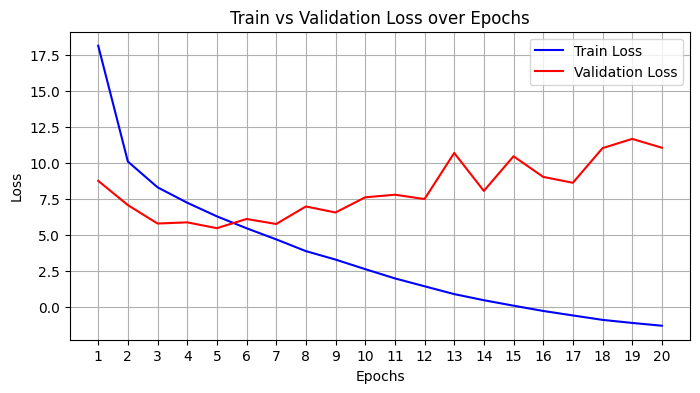

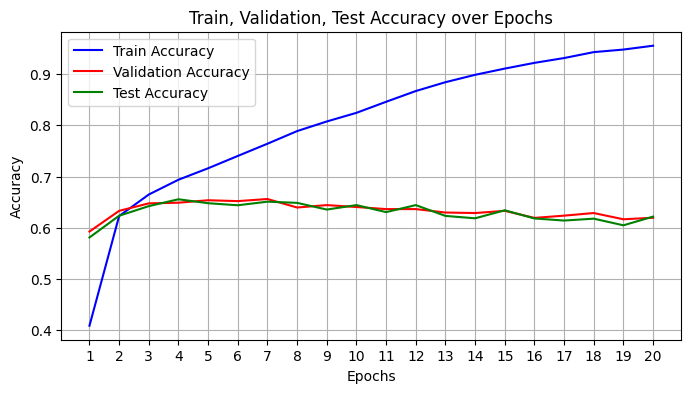

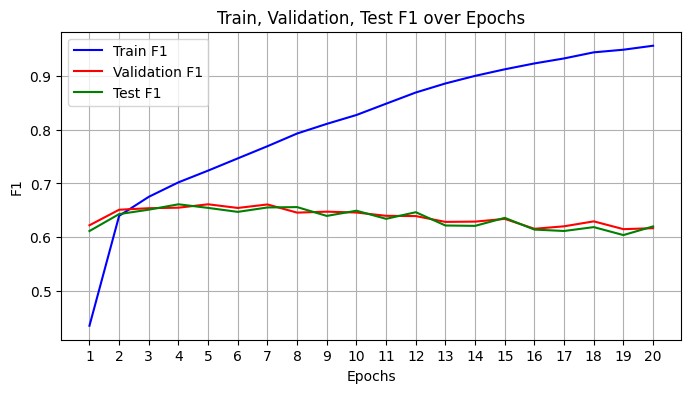

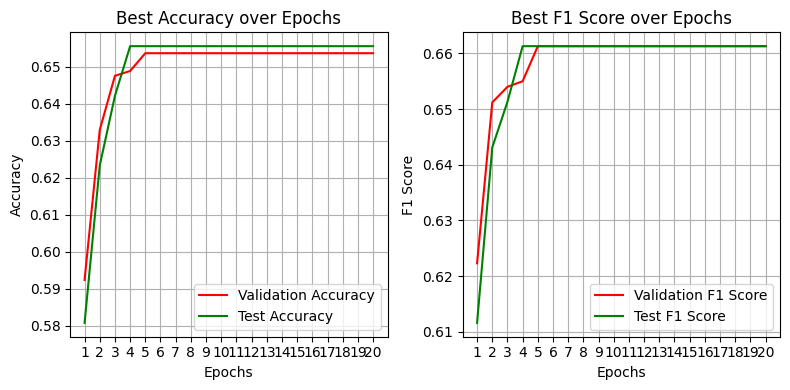

In [104]:
plot_metrics(metrics, "all")